#### Coursework 2

# Question 1

**[Total: 30 marks]**

### Breast cancer dataset

The breast cancer dataset is available in `sklearn` and can be loaded and explored using the code below:

In [1]:
from sklearn import datasets
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter(action = 'ignore', category=DeprecationWarning)
simplefilter(action = 'ignore', category=ConvergenceWarning)

data = datasets.load_breast_cancer()

print(data.keys())
print('\n Features: \n', data.feature_names)
print('\n Labels: ', data.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

 Features: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Labels:  ['malignant' 'benign']


In the code below we create our usual `Features` and `Labels` that are `numpy` arrays and scale the features using `StandardScaler`

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

Features = StandardScaler().fit_transform(data.data)
Labels = data.target

print('Features dim: ', Features.shape)
print('Labels dim: ', Labels.shape)
print('We have {} samples and {} features.'.format(Features.shape[0],Features.shape[1]))

Features dim:  (569, 30)
Labels dim:  (569,)
We have 569 samples and 30 features.


### Explore structure of the data

**Task 1.1 [3 marks]**: Use PCA to reduce the features to two dimensions and plot the reduced data highlighting the labels. To improve visualisation, make the points in the plots transparent by setting `alpha` to 0.5. Are there clear clusters in the data?

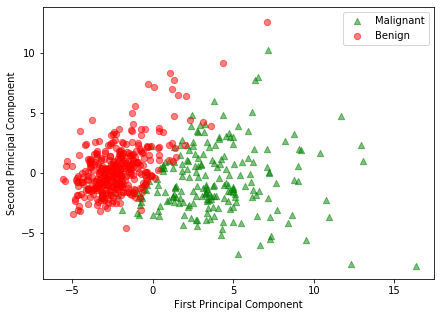

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Perform PCA
pca = PCA(n_components = 2)
pca.fit(Features) 
xPca = pca.transform(Features) 

xAx=xPca[:,0]
yAx=xPca[:,1]

# Plot reduced data
colours={0 : 'green', 1 : 'red'}
labelDisplay={0: 'Malignant', 1: 'Benign'}
marker={0:'^', 1:'o'}
alpha={0:.5, 1:.5}
fig, ax = plt.subplots(figsize=(7,5))

for label in np.unique(Labels):
    ix = np.where(Labels == label)
    ax.scatter(xAx[ix], yAx[ix], c=colours[label], label=labelDisplay[label], s=40, marker=marker[label], alpha=0.5)
    
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()


__Answer:__ There are two clear clusters with a few overlapping points

### Random forest classification

**Task 1.2 [4 marks]:** Perform classification using Random Forest and calculate cross-validated accuracy. Extract and display the two most important features, including their names and importance values.

[0.98275862 0.87931034 0.9122807  0.92982456 0.98245614 0.94736842
 0.92982456 0.98214286 0.96428571 0.98214286]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0, 0.5, 'Importance')

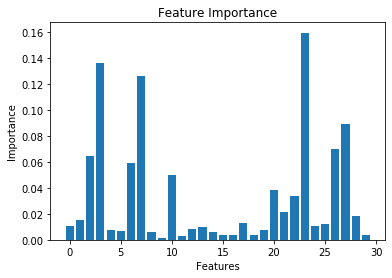

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Fit and evaluate a random forest classifier
modelRandomForest = RandomForestClassifier()
modelRandomForest.fit(Features,Labels)

scores = cross_val_score(modelRandomForest, Features, Labels, cv=10, scoring = 'accuracy')
print(scores)

totalFeatures = Features.shape[1]
plt.bar(np.arange(totalFeatures),modelRandomForest.feature_importances_)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')


Two most important features:  [ 3 23]
--------
Feature: mean area with importance:  0.13627615555820913
Feature: worst area with importance:  0.1594428137060034


Text(0, 0.5, 'Importance')

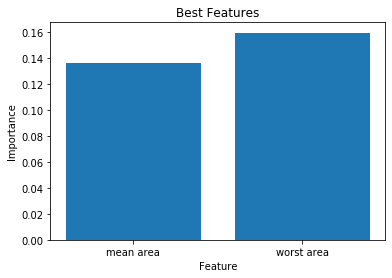

In [5]:
# Identify and print the two most important features
indices = np.argsort(modelRandomForest.feature_importances_)[-2:]
print('Two most important features: ', indices)

# Display the best
print('--------')
bestFeatures = {}
for i in range(indices.size):
    feature = indices[i]
    featureName = data.feature_names[feature]
    featureImportance = modelRandomForest.feature_importances_[feature]
    bestFeatures[featureName] = featureImportance
    print("Feature:", data.feature_names[indices[i]], "with importance: ", featureImportance)

plt.bar(bestFeatures.keys(),bestFeatures.values())
plt.title('Best Features')
plt.xlabel('Feature')
plt.ylabel('Importance')

**Task 1.3 [6 marks]:** Visualise the results of the random forest classification. Perform following steps:
* Perform PCA to reduce features to two dimensions
* Calculate the 2D feature range for the reduced features
* Predict the classification result for the 2D feature range and plot using `contourf`. *Hint: you will need to look up a method* `PCA.inverse_transform` *in sklearn help to predict the labels for the 2D feature range.*
* Plot the reduced data with the labels highlighted on the same plot.

Feature range is between [16.319233231031927, -7.775852804173045]
Feature range is  [24.09508603520497]


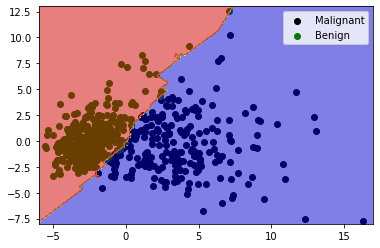

In [6]:
# Transform features using PCA
pca = PCA(n_components=2)
pcaFit = pca.fit_transform(Features) 

# Generate feature space
featuresRange= np.asarray([pcaFit.min(), pcaFit.max()])
print('Feature range is between {}'.format([featuresRange[1],featuresRange[0]]))
print('Feature range is  {}'.format([featuresRange[1] - featuresRange[0]]))

# Predict and plot labels for the features space
predictedLabels = pca.inverse_transform(pcaFit)
labels = modelRandomForest.predict(predictedLabels)
labelDisplay = {0:'Malignant', 1:'Benign'}
minF = np.amin(pcaFit,axis=0)
maxF = np.amax(pcaFit,axis=0)

# Plot the scatter points
plt.scatter(xPca[labels==0,0], xPca[labels==0,1], c='k', label=labelDisplay[0])
plt.scatter(xPca[labels==1,0], xPca[labels==1,1], c='g', label=labelDisplay[1])

# Plot reduced data
xx,yy = np.meshgrid(np.linspace(round(minF[0]), round(maxF[0]) + 1, 570), (np.linspace(round(minF[1]), round(maxF[1]), 570)))
zz = modelRandomForest.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
zz = zz.reshape(xx.shape)

# Plot the mesh grid as a filled contour plot:
plt.contourf(xx, yy, zz, alpha=0.5, cmap = 'jet')
plt.legend()


### Neural network classification
**Task 1.4  [4 marks]**: Neural Network has been trained and it was found that multi-layer perceptron with two hidden layers with `3` and `2` nodes and L2 norm regularisation parameter `1` result in optimal performance. Train the network with these parameters, calculate cross-validated accuracy and visualise the decision boundary as in Task 1.3.

Cross validation accuracy is 0.97


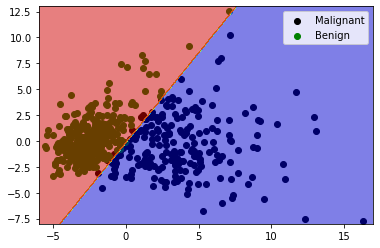

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select and train the model
mlpClassifier = MLPClassifier(solver='lbfgs', alpha=1, activation='logistic', hidden_layer_sizes=(3,2))
mlpClassifier.fit(Features, Labels)
predictions = mlpClassifier.predict(Features)

# Calculate CV accuracy
scores = cross_val_score(mlpClassifier, Features, labels, scoring='accuracy', cv=10).mean()
print("Cross validation accuracy is %s" % round(scores,2))

# Plot result
labelDisplay = {0:'Malignant',1:'Benign'}
plt.scatter(pcaFit[labels==0,0], pcaFit[labels==0,1], c='k', label=labelDisplay[0])
plt.scatter(pcaFit[labels==1,0], pcaFit[labels==1,1], c='g', label=labelDisplay[1])
plt.legend()

xx,yy = np.meshgrid(np.linspace(round(minF[0]), round(maxF[0]) + 1, 570),(np.linspace(round(minF[1]), round(maxF[1]), 570)))
zz = mlpClassifier.predict(pca.inverse_transform(np.c_[xx.ravel(),yy.ravel()]))
zz = zz.reshape(xx.shape)
# Plot the mesh grid as a filled contour plot:
plt.contourf(xx, yy, zz, alpha=0.5, cmap = 'jet')

**Task 1.5: [4 marks]** Visualise the coefficients of all the layers using `bar` plots. Print out number of coefficients in each layer.

Layer 1: 90 coefficients
Layer 2: 6 coefficients
Layer 3: 2 coefficients


Text(0.5, 0, 'Coefficient No.')

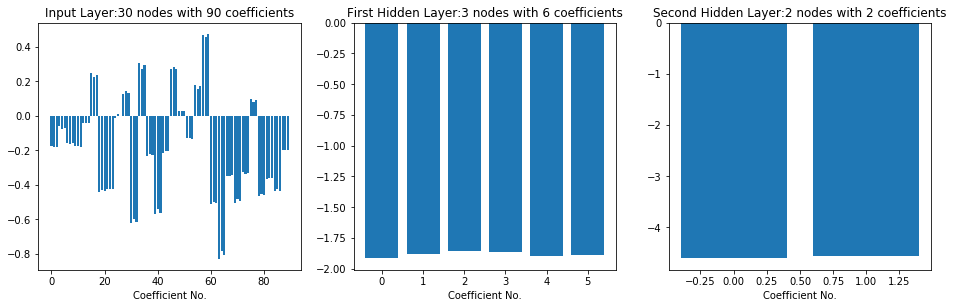

In [8]:
# Get coefficients
layer1= np.array(mlpClassifier.coefs_[0]).flatten()
layer2= np.array(mlpClassifier.coefs_[1]).flatten()
layer3= np.array(mlpClassifier.coefs_[2]).flatten()
layer1Coefs = layer1.shape[0]
layer2Coefs = layer2.shape[0]
layer3Coefs = layer3.shape[0]

# Print them
print("Layer 1:", layer1Coefs, "coefficients")
print("Layer 2:", layer2Coefs, "coefficients")
print("Layer 3:", layer3Coefs, "coefficients")

# Plot them
plt.figure(figsize=[16,10])
plt.subplot(231)
plt.title('Input Layer:30 nodes with 90 coefficients')
plt.bar(range(layer1Coefs), layer1)
plt.xlabel("Coefficient No.")

plt.subplot(232)
plt.title('First Hidden Layer:3 nodes with 6 coefficients')
plt.bar(range(layer2Coefs), layer2)
plt.xlabel("Coefficient No.")

plt.subplot(233)
plt.title('Second Hidden Layer:2 nodes with 2 coefficients')
plt.bar(range(layer3Coefs), layer3)
plt.xlabel("Coefficient No.")

### Feature selection
**Task 1.6 [9 marks]**: You are asked to develop a simple test for detection of breast cancer that could be used in clinical practice. The requirements are 
* There should be as few measurements as possible
* The method for prediction of breast cancer should be as simple as possible.
* Accuracy needs to be as high as possible.

Using feature selection methods that were covered in the lectures find the smallest number of features for predictions while preserving the accuracy as much as possible. Develop a test by training a linear classifier. Display the results of the classification, including the decision boundary, to visually assess the test. Print out the names of the selected features.

Decribe your new test and how you arrived at the solution. Explain why this new test is suitable. Keep your description brief.

*Hint: When reducing number of features don't look for highest performance, but rather smallest number of features for which performance does not drop significantly*

Selected Feature indices:  [ 0  7 20 23]
Selected Feature names: ['mean radius' 'mean concave points' 'worst radius' 'worst area']
Cross-validated accuracy before reducing features:  0.97
Cross-validated accuracy after reducing features  0.95


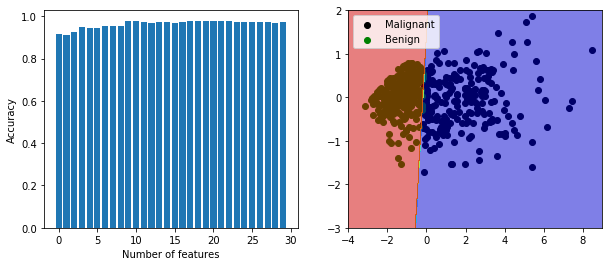

In [9]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# print(Features.shape)
model = LinearSVC()
model.fit(Features, Labels)
preReductionScore = cross_val_score(model, Features, Labels, cv=10, scoring = 'accuracy')

proportionOfFeatures = 1
numberOfFeatures = int(Features.shape[1] * proportionOfFeatures)
scores = np.ones(numberOfFeatures)
for i in range(0, numberOfFeatures):
    rfe = RFE(model, n_features_to_select = i + 1)
    rfe.fit(Features, Labels)
    
    selectedFeatures = rfe.transform(Features)
    model.fit(selectedFeatures, Labels)
    score = cross_val_score(model, selectedFeatures, Labels, cv=10, scoring = 'accuracy')
    scores[i] = score.mean()

# Plot scores
n = scores.shape[0]
x = np.arange(n)
plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
plt.bar(x, scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")

n_features = 4
rfe = RFE(model, n_features_to_select = n_features)
rfe.fit(Features, Labels)

# Get the new features
finalFeatures = rfe.transform(Features)

# Fit the model
modelWithReduction = LinearSVC()
modelWithReduction.fit(finalFeatures, Labels)

# Apply PCA
pca = PCA(n_components=2)
pcaFit = pca.fit_transform(finalFeatures) 

# Predict and plot labels for the features space
predictedLabels = pca.inverse_transform(pcaFit)
labels = modelWithReduction.predict(predictedLabels)
labelDisplay = {0:'Malignant', 1:'Benign'}
minF = np.amin(pcaFit,axis=0)
maxF = np.amax(pcaFit,axis=0)

# Plot result
labelDisplay = {0:'Malignant',1:'Benign'}
plt.subplot(1,2,2)
plt.scatter(pcaFit[labels==0,0], pcaFit[labels==0,1], c='k', label=labelDisplay[0])
plt.scatter(pcaFit[labels==1,0], pcaFit[labels==1,1], c='g', label=labelDisplay[1])
plt.legend()

xx,yy = np.meshgrid(np.linspace(round(minF[0]) - 1, round(maxF[0]) + 1, 570),(np.linspace(round(minF[1]) - 1, round(maxF[1]), 570)))
zz = modelWithReduction.predict(pca.inverse_transform(np.c_[xx.ravel(),yy.ravel()]))
zz = zz.reshape(xx.shape)
# Plot the mesh grid as a filled contour plot:
plt.contourf(xx, yy, zz, alpha=0.5, cmap = 'jet')


# Print:
ind = np.where(rfe.get_support())[0]
print('Selected Feature indices: ', ind)
names = data.feature_names[ind[:]]
print('Selected Feature names:', names)
scoresAfterReduction = cross_val_score(modelWithReduction, finalFeatures, Labels, cv=10, scoring = 'accuracy')
print('Cross-validated accuracy before reducing features: ', round(preReductionScore.mean(),2))
print('Cross-validated accuracy after reducing features ', round(scoresAfterReduction.mean(),2))

__Answer:__ 
<br>
We take an appropriate proportion of the total features (all in this case) and start retrieving their scores. 
We then compare the score from the pre-reduction score (i.e. 30 feature score) and pick the smallest drop in accuracy while still considering the amount of features. Plotting the scores helps us visualise the accuracy drops. 
<br>
Here I chose to keep 4 features as the performance drop is only 0.2. I could have chosen 11 features for example which has a better accuracy score, but that is more than double the features for a very small accuracy increase.
<br>
I think this test is suitable as it alows you to visualise the accuracy drop and keeps both the choice and code as simple as possible. Plotting the decision boundary helps as a sanity check to make sure our decision was correct.

# Question 2

**[Total: 20 marks]**

### Brain MRI

The code below loads two images - T1 and T2 weighted MRI. In this question you will implement 2D Gaussian Mixture Model for segmentation of this multi-channel MRI.

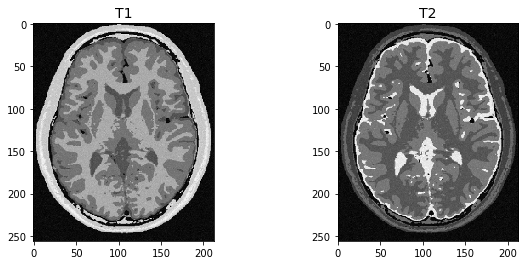

In [61]:
# load  images 
T1 = plt.imread('T1.png')
T2 = plt.imread('T2.png')

# display images
plt.figure(figsize = [10,4])
plt.set_cmap('gray')
plt.subplot(121)
plt.imshow(T1)
plt.title('T1', fontsize = 14)
plt.subplot(122)
plt.title('T2', fontsize = 14)
plt.imshow(T2)

**Task 2.1: [2 marks]** Calculate and plot 2D histogram of the multi-channel MRI. *Hint: matplotlib package has a suitable function*

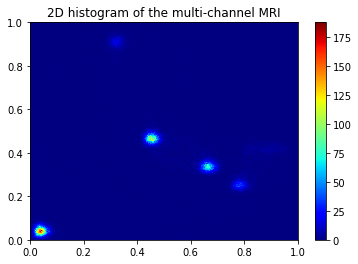

In [170]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
plt.hist2d(T1.ravel(), T2.ravel(), bins=255, cmap=plt.cm.jet)
plt.colorbar()
plt.title("2D histogram of the multi-channel MRI")
plt.show()

### GMM segmentation
**Task 2.2 [6 marks]:** Given the histogram above, decide how many clusters you need to segment the image. Perform GMM clustering using 2D feature space composed of these two images. Display the segmentation. Decide whether the segmentation worked by visual assessment.

(54528, 2)
(256, 213)


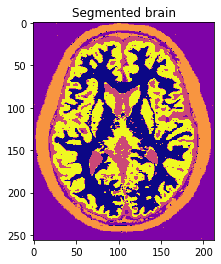

In [171]:
from sklearn.mixture import GaussianMixture
import numpy as np
# print(T1.shape)
# print(T2.shape)
t1Flattened = T1.flatten().reshape(-1,1)
t2Flattened = T2.flatten().reshape(-1,1)

# Select model
model=GaussianMixture(n_components=5)

# Create feature matrix
features = np.transpose(np.vstack([t1Flattened.ravel(), t2Flattened.ravel()]))
print(features.shape)

# Fit and predict
model.fit(features)
predictedLabels = model.predict(features)
predictedLabels = predictedLabels + 1
labels2D = predictedLabels.reshape(-1,1).reshape(T1.shape)
print(labels2D.shape)
# Display segmentation
plt.imshow(labels2D)
plt.title("Segmented brain")
plt.set_cmap('plasma')


**Task 2.3: [6 marks]** Predict and display posterior probability maps for all classes. Create a plot with as many subplots as classes and display one posterior probability map in each. Display a title with the name of the tissue represented by that propability map.

Dimensions of probability  (54528, 5)


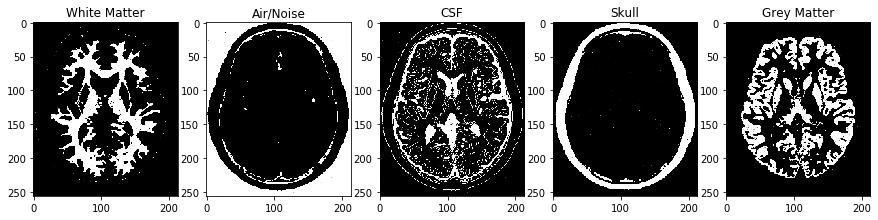

In [177]:
# Predict probabilistic segmentations
predictProba = model.predict_proba(features)
print('Dimensions of probability ', predictProba.shape)

#display
plt.figure(figsize = [15,4])
plt.set_cmap('gray')

titles = ['White Matter', 'Air/Noise', 'CSF', 'Skull', 'Grey Matter']

for i in range(predictProba.shape[1]):
    # take only posteriors for class i
    probability = predictProba[:,i]

    # reshape
    post2D = probability.reshape(-1,1).reshape(T1.shape)
    
    # display
    plt.subplot(1, predictProba.shape[1], i+1)
    plt.title(titles[i])
    plt.imshow(post2D)

**Task 2.4 [6 marks]**: Predict likelihood function $p(y|\phi)$ for the intensity ranges of the two images. Display the likelihood next to the histogram (in a figure with two subplots) and compare. Is that what you expected? Try to reason why the likelihood might differ from the histogram. Which classes had PDFs with behaviour that was not expected?

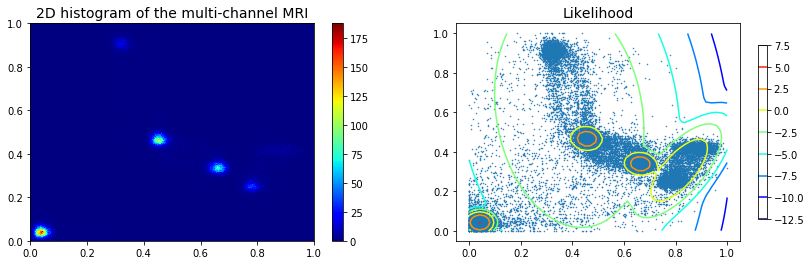

In [175]:
plt.figure(figsize = [14,4])

# Plot the 2d histogram
plt.subplot(121)
plt.hist2d(T1.ravel(), T2.ravel(), bins = 256, cmap = plt.cm.jet)
plt.colorbar()
plt.title('2D histogram of the multi-channel MRI', fontsize = 14)


# Plot the likelihood
x = np.linspace(0, 1.)
y = np.linspace(0., 1.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T

Z = model.score_samples(XX)
Z = Z.reshape(X.shape)

plt.subplot(122)
plt.title('Likelihood', fontsize = 14)
plt.scatter(features[:, 0], features[:, 1], 0.25)

CS = plt.contour(X, Y, Z, cmap = plt.cm.jet)

CB = plt.colorbar(CS, shrink=0.8, extend='both')


plt.show()

__Answer:__ 
I expected the class on the top (top faint cluster in histogram) to be recognised/picked up in the likelihood function as even though it is a bit faint, it is clearly there. 
<br>
At the same time, the furthest right cluster (which is barely visible and I chose not to include as a component) is being clustered along with the bottom right cluster when I expected it to be ignored.

# Question 3

**[Total: 20 marks]**

## Random forest from scratch

In the lectures we created our own Decision Tree and Bagging classification methods which we implemented in `DecisionTree.py` and `Bagging.py`. Random forest performs bootstrapping and aggregation just like bagging, but on top of that it also performs random selection of features at each node in the decision tree. In this question you will extend the Decision Tree and Bagging functions to create your own Random Forest.

**Task 3.1 [2 marks]**  In the box below write what is the effect selecting a random subset of features at each node in terms of reducing the bias or variance of the model and why.

__Answer:__ 
<br>
Increases randomisationby subsampling from the feature space at each node. Therefore: 
1. Each node can only select its optimal feature (to split on) based on a sub-set of the total feature space 
2. This de-correlates tree predictions
3. Increases robustness against overfitting

### Getting started

The first thing we need to do is import our original `DecisionTree` and `Bagging` modules. We can call the functions from these imported modules using the ```DT.``` or ```BG.``` syntax. Run the code bellow to import the modules.

In [41]:
import DecisionTree as DT
import Bagging as BG
import numpy as np
import sys

Training and testing random forests behaves very similarly to that of bagged ensembles of decision trees, with the exception that when optimising for the best split of the data at each node in function `get_best_split`, only a subset of the features is considered. To do that we will write a new fuction `get_feature_subset` where the maximum proportion of features each node is controlled by the variable `max_f`. 

We will also need to modify several other functions to support the new functionality. The functions that don't need to be modified can be called directly from the imported modules using `DT.` and `BG.` Think very carefully which versions of the functions you need to use to avoid mistakes and loosing marks.

### Dataset

We will test the new functions on the simulated classification dataset. We will create a two-class problem, creating a dataset with 1000 samples and 10 features, of which 3 will be informative (necessary for the classification) and none redundant. Run the code bellow to create the dataset.

More info on the simulated dataset here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification

In [42]:
import sklearn.datasets as datasets 

# Build a classification task using 3 informative features
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=2)

print('Number of samples: ', X.shape[0])
print('Number of features: ', X.shape[1])
print('Size of the label vector: ', y.shape)

Number of samples:  1000
Number of features:  10
Size of the label vector:  (1000,)


### Select subsets of features

**Task 3.2 [4 marks]:** Write a function `get_feature_subset` which, given a number of features `n_features` and the proportion of features to be sampled `max_f`, will return an array `indices`, indicating which features have been selected. This is achieved by random sampling *without replacement*. Complete the code bellow to do that.

In [43]:
from numpy.random import randint 
import random

# Complete the code for the function
def get_feature_subset(n_features,max_f):
    """       
        Returns indices of a random subset of features
        input:
            n_features: number of features
            max_f: the proportion of features available for each node
                             
        output:
            indices: list of selected features 
    """
    n_selected = int(n_features * max_f)
    return np.random.choice(n_features, n_selected, replace=False)

# Test function
ind = get_feature_subset(X.shape[1],0.3)
print(ind)

[2 8 9]


### Update get_best_split

**Task 3.3 [4 marks]**:  Now edit function ```get_best_split``` below to:
1. Call `get_feature_subset` and have it return a random subset features with proportion `max_f`, but only if `max_f` is less than 1.0
2. Edit the outer loop (variable `index`) such that it loops only over this subset of features

In [44]:
def get_best_split(dataset, max_f):
    """
        Search through all attributes and all possible thresholds to find the best split for the data
        input:
            dataset = array (n_samples,n_features+1) 
                    rows are examples 
                    last column indicates class membership
                    remaining columns reflect features/attributes of data
            max_f: the proportion of features available for each node
                             
        output:
            dict containing: 1) 'index' : index of feature used for splittling on
                             2)  'value': value of threshold split on
                             3) 'branches': tuple of data arrays reflecting the optimal split into left and right branches
                             
    """
    # Extract number of features
    n_features = dataset.shape[1]-1

    #### AMEND CODE HERE ###
    # get random feature indices
    if max_f < 1.0:
        features = get_feature_subset(n_features, max_f) 
    else:
        features=np.arange(n_features)
    print('Selected features:', features)
        
    # identify which labels we have
    class_values=np.unique(dataset[:,-1])
    
    # initalise optimal values prior to refinment
    best_cost=sys.float_info.max # initialise to max float
    best_value=sys.float_info.max # initialise to max float
    best_index=dataset.shape[1]+1 # initialise as greater than total number of features
    best_split=tuple() # the best_split variable should contain the output of test_split that corresponds to the optimal cost

    
    #### AMEND CODE HERE ###
    # iterate over all selected features/attributes (columns of dataset)
    for index in features: 
        # Trialling splits defined by each row value for this attribute
        for r_index,row in enumerate(dataset):
            branches=DT.test_split(index, row[index], dataset)

            cost=DT.split_cost(branches,class_values)
            if cost < best_cost:
                best_cost=cost
                best_split=branches
                best_index=index
                best_value=row[index]
                
                
    return {'index':best_index, 'value':best_value, 'branches':best_split}

# Test function
dataset = np.concatenate([X,y.reshape(-1,1)],axis=1)
ans = get_best_split(dataset, 0.3)
print('Best index: ',ans['index'])
print('Best value: ',round(ans['value'],2))

Selected features: [6 9 1]
Best index:  6
Best value:  -1.66


### Update remaining functions

Now we need to make sure that the argument `max_f` is passed to all functions that need it. Bellow is the updated function `run_split`. Run the code.

In [46]:
def run_split(node, max_depth, min_size, depth, max_f):
     
    """
        Recursively splits nodes until termination criterion is met
        input:
            node = dict containing: 1) 'index' : index of feature used for splittling on
                             2)  'value': value of threshold split on
                             3) 'branches': tuple of data arrays reflecting the optimal split into left and right branches
            max_depth: int determining max allowable depth for the tree
            min_size : int determining minimum number of examples allowed for any branch
            depth: current depth of tree 
            max_f: the proportion of features available for each node            
            
            
        Output:
            node: is returned by value and returns a recursion of dicts representing the structure of the whole tree
    """
    left, right = node['branches']
    del(node['branches'])
    # check for whether all data has been assigned to one branch; if so assign both branches the same label
    if left.shape[0]==0 :
        node['left'] = node['right'] = DT.to_terminal(right)       
        return
    if right.shape[0]==0 :
        node['left'] = node['right'] = DT.to_terminal(left)       
        return
    # check for max depth; if exceeded then estimate labels for both branches
    if max_depth != None and depth >= max_depth:
        node['left'], node['right'] = DT.to_terminal(left), DT.to_terminal(right)
        return
    # process left child
        # in first instance check whether the number of examples reaching the left node are less than the allowed limit
        # if so assign as a terminal node, if not then split again
    if len(left) <= min_size:
        node['left'] = DT.to_terminal(left)
    else:
        node['left'] = get_best_split(left,max_f)
        run_split(node['left'], max_depth, min_size, depth+1,max_f)
    
    # process right child as for left
    if len(right) <= min_size:
        node['right'] = DT.to_terminal(right)
    else:
        node['right'] = get_best_split(right,max_f)
        run_split(node['right'], max_depth, min_size, depth+1,max_f)

**Task 3.4 [ 3 marks]**: Your task is now to edit the function `build_tree`  
* to include an optional parameter `max_f`, which allows the user to define a maximum proportion of features to be sampled from at each node

* to supply `max_f` to all functions which call `get_best_split` (including itself). 

Edit each line of code where this is the case.

In [47]:
def build_tree(train, max_depth=None, min_size=1, max_f = 1):
    """
    Builds and returns final decision tree
    
    input:
        train : training data array (n_samples,n_features+1)
        max_depth: user defined max tree depth (int)
        min_size: user defined minimum number of examples per tree tree depth (int)
        max_f: the proportion of features available for each node  
    """
    # create a root node split by calling get_best_split on the full training set
    root = get_best_split(train, max_f) 
    # now build the tree using run_split
    run_split(root, max_depth, min_size, 0, max_f) 
    return root

### Create a Forest

Now what remains is to create our forest of trees. 

Random Forests are exactly the same as bagging _EXCEPT_ that as well as creating bootstrapped samples of examples from the dataset they also randomly sample subsets of features at each node. This means we can continue to use the functions we built for our `Bagging` method but with small edits to ensure that they pass the user defined parameter `max_f` to our new `DecisionTree` functions

**Task 3.5 [2 mark]** Edit function `create_bagged_ensemble` to support the new user defined argument `max_f`

*Hint:* here you will need to call the build_tree function you defined above.

In [48]:
def create_bagged_ensemble(data, max_depth, min_size, n_trees, max_f, random_state=42): # 1 mark
    
    ''' Create a bagged ensemble of decision trees
    input:
        data: (n_samples,n_features+1) data array
        max_depth: max depth of trees
        min_size: minimum number of samples allowed in tree leaf nodes
        n_trees: total number of trees in the ensemble
        random_state: fixes random seed
    output:
        bagged_ensemble: list of decision trees that make up the bagged ensemble
    '''
    
    bagged_ensemble=[]
    for i in range(n_trees):
        print('building tree', i)
        sample = BG.bootstrap_sample(data, random_state)
        tree = build_tree(data, max_depth, min_size, max_f)
        bagged_ensemble.append(tree)
    
    return bagged_ensemble

### Evaluate

The code bellow creates a training and test dataset. Run the code.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dataset_train=np.concatenate((X_train,np.expand_dims(y_train,axis=1)),axis=1)
dataset_test=np.concatenate((X_test,np.expand_dims(y_test,axis=1)),axis=1)

We will now evaluate the performance of our new Random Forest and compare it to the performance of a single decision tree. To calculate accuracy, we will predict the labels of the test set using the unchanged funcions `predict` that are already implemented in `Bagging` and `DecisionTree` modules.

**Task 3.6 [ 2 marks]**  Build a single decision tree using your newly implemented function and set the parameters as `max_depth=3`, `min_size=1`, `max_f=1.0`. Report the accuracy on the test set. 

In [52]:
# Build the tree
tree = build_tree(dataset_train, max_depth = 3, min_size = 1, max_f = 1)

# Predict on test set
predictions = DT.predict(tree, dataset_test)

# Calculate and print accuracy
print('Accuracy:', round(DT.score(y_test, predictions),2))

Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Selected features: [0 1 2 3 4 5 6 7 8 9]
Accuracy: 0.92


**Task 3.7 [ 3 marks]**  Build and train your newly implemeted Random Forest with parameters `max_depth=3`, `min_size=1`, `max_f=0.3`, n_trees=10. Report the accuracy on the test set. 

Note: This might take a while to run.

In [53]:
# Build the forest
forest = create_bagged_ensemble(dataset_train, max_depth = 3 , min_size = 1,  n_trees = 10, max_f = 0.3, random_state=42)

# Predict on test set
rf_predictions = BG.bagging_predict(forest, dataset_test)

# Calculate and print accuracy
print('Accuracy:', round(DT.score(y_test, rf_predictions),2))

building tree 0
Selected features: [3 8 5]
Selected features: [7 1 3]
Selected features: [6 1 9]
Selected features: [3 6 5]
Selected features: [0 2 6]
Selected features: [1 5 0]
Selected features: [7 5 6]
Selected features: [8 6 7]
Selected features: [3 6 5]
Selected features: [8 4 1]
Selected features: [8 0 3]
Selected features: [2 8 0]
Selected features: [2 4 1]
Selected features: [9 4 3]
building tree 1
Selected features: [5 2 0]
Selected features: [7 6 4]
Selected features: [1 2 3]
Selected features: [1 7 6]
Selected features: [6 7 5]
Selected features: [8 3 9]
Selected features: [4 6 1]
Selected features: [0 8 4]
Selected features: [5 4 7]
Selected features: [0 6 4]
Selected features: [6 2 7]
Selected features: [5 2 8]
Selected features: [6 9 1]
Selected features: [9 8 2]
Selected features: [0 2 9]
building tree 2
Selected features: [6 0 1]
Selected features: [1 7 9]
Selected features: [8 4 0]
Selected features: [1 2 5]
Selected features: [5 4 0]
Selected features: [4 0 3]
Selecte

# Question 4

**[Total: 20 marks]**

## Detecting cancer from histopatological images
In this question we will apply feature extractors to classify histopatological images for presence of cancer. More details about the PatchCamelyon dataset can be found here https://github.com/basveeling/pcam.
<img src="pcam.jpg" style="max-width:100%; width: 100%; max-width: none">

### Load the dataset

Run the code bellow to load the dataset from the file `histological_data.npz`.

In [54]:
# Load dataset from .npz file
data = np.load('histological_data.npz')

# Train images and labels
X_train = data['X_train']
y_train = data['y_train']

# Test images and labels
X_test  = data['X_test']
y_test  = data['y_test']

# Print shapes here
print('Training data - images:', X_train.shape)
print('Training data - labels:',y_train.shape)
print('Test data - images:',X_test.shape)
print('Test data - labels:',y_test.shape)

Training data - images: (1500, 96, 96)
Training data - labels: (1500,)
Test data - images: (150, 96, 96)
Test data - labels: (150,)


Let's now plot a few example images

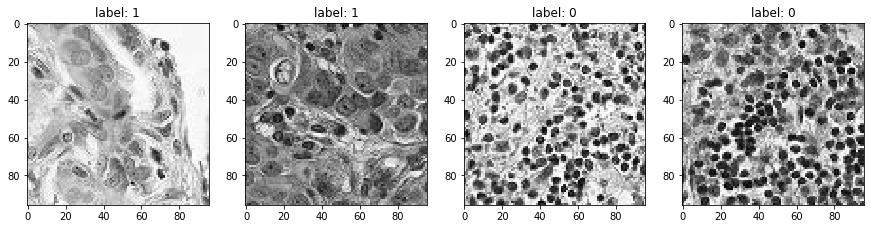

In [55]:
id_images = [4, 5, 6, 7]

plt.figure(figsize=(15, 8))
for i in np.arange(0, 4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[id_images[i], :, :], cmap='gray')
    plt.title('label: ' + str(y_train[id_images[i]]))

### Feature extraction

In the lectures we have seen a number of feature extractors that are available at `skimage`, including `daisy`. Bellow is an example of feature extraction using daisy. Use the code bellow to experiment with the parameters.

Feature vector shape daisy:  (4, 4, 104)


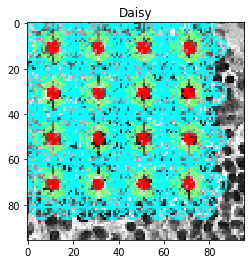

In [56]:
from skimage.feature import daisy

# example image
img = X_train[id_images[i], :, :]

# example feature extraction using daisy
features_daisy, visualisation_daisy = daisy(img, step=20, radius=11, rings=2, histograms=6, orientations=8, visualize=True)
plt.imshow(visualisation_daisy)
plt.title('Daisy')
# Extracted features
print('Feature vector shape daisy: ', features_daisy.shape)

**Task 4.1 [4 marks]:** In the function bellow implement a feature extractor using `daisy`. The function should accepts a 2D image and return a vector of features. Don't forget to make sure that the feature vector is flattened to 1 dimension. You can start with the parameter setting given above, but you will change the parameters later on.

In [57]:
from skimage.feature import daisy

def my_feature_extractor(image, step, radius, rings, histograms, orientations):
    return daisy(image, step=step, radius=radius, rings=rings, histograms=histograms,orientations=orientations, visualize=False).flatten()

Run the code bellow to perform feature extraction for the whole dataset. It will take a while for it to finish.

In [58]:
# Perform feature extraction on the train/test set

# Create empty arrays
X_train_features = []
X_test_features  = []

# Daisy parameters
step = 20
radius = 15
rings = 3
histograms = 6
orientations = 8 

# Go through all the images, perform feature extraction and then append them to the list
for img in X_train:
    X_train_features.append(my_feature_extractor(img,step, radius, rings, histograms, orientations))
for img in X_test:
    X_test_features.append(my_feature_extractor(img,step, radius, rings, histograms, orientations))
    
# Make the lists back into numpy arrays
X_train_features = np.asarray(X_train_features)
X_test_features  = np.asarray(X_test_features)

# Print dimensions
print('Feature matrix train: ', X_train_features.shape)
print('Feature matrix test: ', X_test_features.shape)

Feature matrix train:  (1500, 2432)
Feature matrix test:  (150, 2432)


__Task 4.2 [4 marks]:__ In the box bellow explain the meaning of the dimensions of the two matrices, printed by the code in the cell above.

__Answer:__ 
<br>
First dimension of `X_train_features` corresponds to 1500 samples.
<br>
Second dimension of `X_train_features` corresponds to number of extracted features (using daisy).
<br>
These will be  used for training.
<br>
<br>
First dimension of `X_test_features` corresponds to 150 samples.
<br>
Second dimension of `X_test_features` corresponds to number of extracted features (using daisy).
<br>
These will be  used for testing.

__Task 4.3 [8 marks]:__ Bellow you are given a function `PerformanceMeasures` to calculate the performance of a classifier. Furthermore, the features of the training set have been scaled using the `StandardScaler`. You are also given a `RandomForestClassifier` model with parameter `min_samples_leaf = 50` to prevent overfitting due to a large number of extracted features. Complete the code bellow to
* fit the `RandomForestClassifier` model to the training data
* calculate the performance measures on the training set to spot overfitting
* calculate the performance measures on the test set to evaluate performance

Training set:
Accuracy:  0.82
Sensitivity:  0.66
Specificity:  0.94
Precision:  0.88


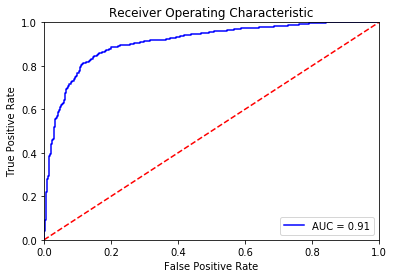

Test set:
Accuracy:  0.75
Sensitivity:  0.47
Specificity:  0.89
Precision:  0.68


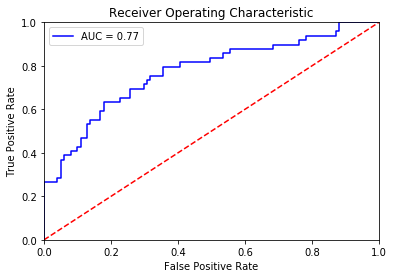

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics


def PerformanceMeasures(model,features,labels):
    Labels_predicted = model.predict(features)
    tn, fp, fn, tp = confusion_matrix(labels, Labels_predicted).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    specificity = tn/(tn+fp)
    sensitivity = tp/(tp+fn)
    precision = tp/(tp+fp)
    print('Accuracy: ', round(accuracy,2))
    print('Sensitivity: ', round(sensitivity,2))
    print('Specificity: ', round(specificity,2))
    print('Precision: ', round(precision,2))

    
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(features)
    labs = [int(i) for i in labels] 
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(labs, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot RoC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()

sc = StandardScaler()

Features = sc.fit_transform(X_train_features)
Labels = y_train

# Fit and evaluate a random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, min_samples_leaf = 50) 

# fit the model
model.fit(Features, Labels)

# Calculate performance measures on training set
print('Training set:')
PerformanceMeasures(model, Features, Labels)

# Calculate performance measures on test set
test_features = sc.transform(X_test_features)
print('Test set:')
PerformanceMeasures(model, test_features, y_test)

__Task 4.4 [4 marks]:__ Try to improve the performance of your classifier by changing the parameters of the feature extractor in the function `my_feature_extractor`. Once you have decided on your favourite parameters, comment on the performance of the classifier in the box bellow.

__Answer:__ 
<br>
In practice, this classifier would probably not be very good choice to classify histopathological images for presence of cancer. The performance of classifier drops significantly from training to test, especially in regards to sensitivity and precision. When choosing the parameters, a great deal of attention is given to specificity and sensitivity. 
<br><br>
High sensitivity is important because it means that fewer cases of disease are missed. High specificity is also important because it means that we avoid designating an individual as diseased and therefore we avoid putting them through unnecessary diagnostic procedures. 
In this case, the classifier could not achieve high values for both so I decided to maximise the area under the curve in the RoC graph.